In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import proj3d
#from sklearn.linear_model import SGDClassifier as LR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.mixture import GMM
from sklearn.lda import LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from numpy.random import multivariate_normal
from sklearn.datasets import load_iris
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

/Users/msamuel/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/msamuel/Projects/scikit-learn/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/Users/msamuel/Projects/scikit-learn/sklearn/cross_validation.py:42: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
classes = {1:"walking", 2:"walking upstairs", 3:"walking downstairs", 4:"sitting", 5:"standing", 6:"laying"}

In [4]:
# %load loadData.py

def load(synthetic=False):
  if (not synthetic):
    train = pd.read_csv('train/X_train.txt', header=None, delim_whitespace=True)
    test = pd.read_csv('test/X_test.txt', header=None, delim_whitespace=True)

    label = pd.read_csv('train/y_train.txt', header=None, delim_whitespace=True)
    test_label = pd.read_csv('test/y_test.txt', header=None, delim_whitespace=True)

    return train, label, test, test_label

  mu1 = np.array([0, 1])
  mu2 = np.array([-0.5, -1.0])
  mu3 = np.array([3.2, .6])
  mu4 = np.array([3, -1])

  s1 = np.matrix([[1, 0.1], [0.1, 0.1]])
  s2 = np.matrix([[0.3, 0.2], [0.2, 0.4]])
  s3 = np.matrix([[0.5, 0.01], [0.01, 0.1]])
  s4 = np.matrix([[0.5, -0.2], [-0.2, 0.2]])

  d1 = multivariate_normal(mu1, s1, 500)
  d2 = multivariate_normal(mu2, s2, 500)
  d3 = multivariate_normal(mu3, s3, 500)
  d4 = multivariate_normal(mu4, s4, 500)
  syntheticTrain = np.vstack((d1,d2,d3,d4))
  syntheticTrainLabel = np.hstack(([1] * 500, [2] * 500, [3] * 500, [4] * 500))


  t1 = multivariate_normal(mu1, s1, 500)
  t2 = multivariate_normal(mu2, s2, 500)
  t3 = multivariate_normal(mu3, s3, 500)
  t4 = multivariate_normal(mu4, s4, 500)
  syntheticTest = np.vstack((t1,t2,t3,t4))
  syntheticTestLabel = np.hstack(([1] * 500, [2] * 500, [3] * 500, [4] * 500))

  fig, (ax1) = plt.subplots(1,1)

  ax1.scatter(d1[:,0], d1[:,1], color='red')
  ax1.scatter(d2[:,0], d2[:,1], color='blue')
  ax1.scatter(d3[:,0], d3[:,1], color='green')
  ax1.scatter(d4[:,0], d4[:,1], color='black')

  return syntheticTrain, syntheticTrainLabel, syntheticTest, syntheticTestLabel


# PCA

In [ ]:
trainData, trainLabels, testData, testLabels = load()

In [ ]:
pca = PCA(n_components=3)
#X = pca.inverse_transform(pca.fit_transform(trainData))
X = pca.fit_transform(trainData)

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)

idx1 = np.array(trainLabels==1).ravel()
idx2 = np.array(trainLabels==2).ravel()
idx3 = np.array(trainLabels==3).ravel()
idx4 = np.array(trainLabels==4).ravel()
idx5 = np.array(trainLabels==5).ravel()
idx6 = np.array(trainLabels==6).ravel()

ax.plot(X[idx1,0], X[idx1,1], X[idx1,2], 'bo', ms=3, label="walking")
ax.plot(X[idx2,0], X[idx2,1], X[idx2,2], 'ro', ms=3, label="walking upstairs")
ax.plot(X[idx3,0], X[idx3,1], X[idx3,2], 'go', ms=3, label="walking downstairs")
ax.plot(X[idx4,0], X[idx4,1], X[idx4,2], 'co', ms=3, label="sitting")
ax.plot(X[idx5,0], X[idx5,1], X[idx5,2], 'yo', ms=3, label="standing")
ax.plot(X[idx6,0], X[idx6,1], X[idx6,2], 'mo', ms=3, label="laying")
ax.legend()

# GMM

In [12]:
trainData, trainLabels, testData, testLabels = load()

lda = LDA(solver="svd", store_covariance=True)
trainData_lda = pd.DataFrame(lda.fit_transform(trainData, trainLabels))
testData_lda = pd.DataFrame(lda.transform(testData))


In [28]:
all_models = []
all_bics = []

for i in xrange(6):
    models = []
    bics = []
    for j in xrange(100):
        idx = np.array(trainLabels==i+1).ravel()
        idx_test = np.array(testLabels==i+1).ravel()

        model = GMM(n_components=j+1, covariance_type="full", random_state=7)
        model.fit(trainData_lda[idx], trainLabels[idx])
        models.append(model)
        bics.append(model.bic(trainData_lda[idx]))
    all_models.append(models)
    all_bics.append(bics)

(13000, 18000)

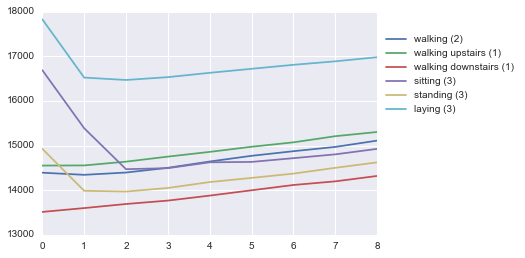

In [40]:
best = []
for i in xrange(6):
    minVal = np.argmin(all_bics[i])
    best.append(minVal)
    plt.plot(all_bics[i], label="{0} ({1})".format(classes[i+1], minVal + 1))
    plt.legend(loc='lower left', bbox_to_anchor=(1,0.5))
plt.xlim([0,8])
plt.ylim([13000,18000])

In [32]:
best_models = []
scores_train = np.ndarray(shape=(7352, 6))
scores_test = np.ndarray(shape=(2947, 6))
for i in xrange(6):
    best_model = all_models[i][best[i]]
    best_models.append(best_model)
    scores_train[:,i] = best_model.score(trainData_lda)
    scores_test[:,i] = best_model.score(testData_lda)

In [46]:
predictions = np.argmax(scores_train, axis=1) + 1
errors = (predictions != np.array(trainLabels).ravel())
print "Train Error: {0:0.2f}%".format(100 * np.mean(errors))

predictions = np.argmax(scores_test, axis=1) + 1
errors = (predictions != np.array(testLabels).ravel())
print "Test Error: {0:0.2f}%".format(100 * np.mean(errors))

Train Error: 1.35%
Test Error: 2.92%
